Plotting the Dark Sky Mass Function
-----------------------------------

The mass function relates the number of objects in the Universe as a function of their mass.  Here we can use the data from the Dark Sky Simulations to directly calculate this function. This is a very similar script to what was used in our Early Data Release paper.

First we use thingking to directly access the histograms of the halo masses. Each histogram corresponds to a separate simulation from the Dark Sky Simulations.

In [1]:
%matplotlib inline
import yt
import thingking
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as col
import matplotlib.cm as cm
import sys, string, math

def discrete_cmap(N=8):
    """create a colormap with N (N<15) discrete colors and register it"""
    # define individual colors as hex values
    cpool = [ '#000000', '#ff0000', '#00e000', '#0000ff', '#00e0e0',
              '#ff00ff', '#e0e000', '#ffa500', '#ee82ee', '#808080',
              '#800000', '#008000', '#000080', '#808000', '#800080' ]
    cmap3 = col.ListedColormap(cpool[0:N], 'indexed')
    cm.register_cmap(cmap=cmap3)

discrete_cmap(5)
color=cm.get_cmap('indexed')

mf_prefix = "http://darksky.slac.stanford.edu/data_release/mass_function/"
mfs = [
    #"ds14_a_halos_1.0000.hist50_m200b.sdf",
    "ds14_a_halos_1.0000.hist8_m200b",
    "ds14_g_1600_4096_m200b_1.0000.hist8_m200b",
    "ds14_g_800_4096_m200b_1.0000.hist8_m200b",
    "ds14_g_200_2048_m200b_1.0000.hist8_m200b",
    "ds14_g_100_2048_m200b_1.0000.hist8_m200b",
]
mfs = [mf_prefix + mf for mf in mfs]

Plotting
--------

Here we create figure where we plot the number of halos greater than a given mass, as a function of that mass.  This is normalized by the volume of the simulation. 

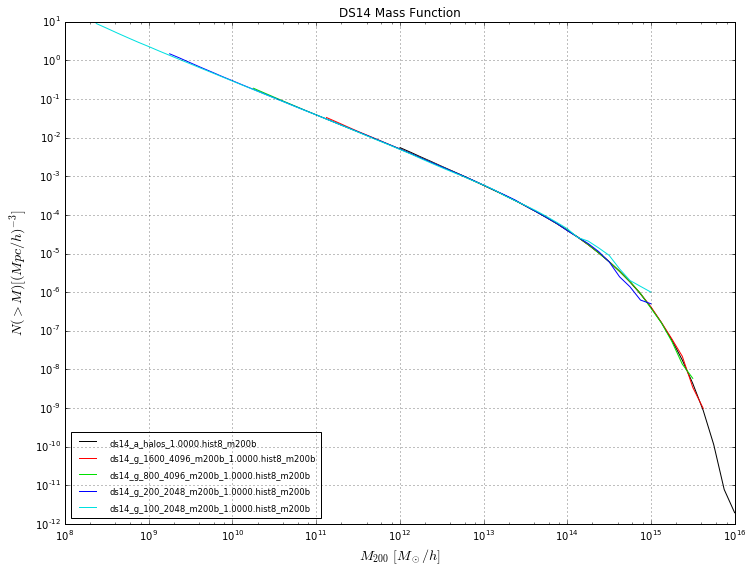

In [2]:
# Only plot bins with poisson uncertainty of 5%
# The DS EDR paper uses sample_cut = 1000
sample_cut = (1.0/0.05)**2


i=0
fig = plt.figure(figsize=(12,9))
xx = fig.add_subplot(111)
vols = np.array([8000.0, 1600, 800, 200, 100])
for aname, vol in zip(mfs, vols):
    bin_center_mass, dn_dlnM, sigma, dlogsdlogm, lower_pmass, n, expected, dm, ds, dlnm, dlns = thingking.loadtxt(aname, unpack=True)
    tag = aname.split("/")[-1]

    mask = (lower_pmass[:] >= 0) * (n[:] >= 0)
    if n[mask].sum() > 0:
        ngtm = np.cumsum(n[mask][::-1])[::-1]
        xx.loglog(bin_center_mass[mask], ngtm/vol**3,
                    ms=4, mec='None', color=color(i), label=tag)
    i += 1

xx.set_title('DS14 Mass Function')
xx.set_xscale('log')
xx.set_yscale('log')
xx.set_xlabel('$M_{200}\  [M_\odot/h]$', fontdict={'fontsize':14})
xx.set_ylabel('$N(>M) [(Mpc/h)^{-3}]$', fontdict={'fontsize':14})
leg = xx.legend(loc="lower left",labelspacing=.5)
for t in leg.get_texts():
    t.set_fontsize('small')    # the legend text fontsize
xx.xaxis.grid(True, which='major')
xx.yaxis.grid(True, which='major')
plt.show()

Plot Relative To Tinker et al. 2008
-----------------------------------

We can also compare our results to those from Tinker et al 2008. This gives us information as to how adding information from a very large volume simulation like ds14_a changes our view of abundance of the most massive halos.

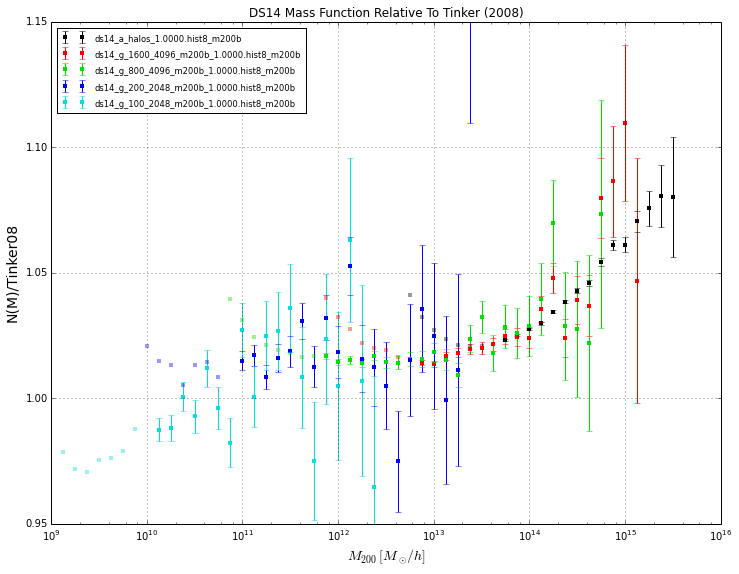

In [ ]:
# Only plot bins with poisson uncertainty of 5%
# The DS EDR paper uses sample_cut = 1000
sample_cut = (1.0/0.05)**2


fig = plt.figure(figsize=(12,9))
xx = fig.add_subplot(111)

i = 0
for aname in mfs:
    bin_center_mass, dn_dlnM, sigma, dlogsdlogm, lower_pmass, n, expected, dm, ds, dlnm, dlns =         thingking.loadtxt(aname, unpack=True)
    tag = aname.split("/")[-1]

    mask = (lower_pmass[:] >= 1000) * (n[:] >= sample_cut)
    if n[mask].sum() > 0:
        err = 1.0/np.sqrt(n[mask])
        xx.errorbar(bin_center_mass[mask], n[mask]/expected[mask],
                    yerr=err, fmt='s', ms=4, mec='None', color=color(i), label=tag)
    mask = (lower_pmass[:] >= 100) * (lower_pmass[:] < 800)
    if n[mask].sum() > 0:
        err = 1.0/np.sqrt(n[mask])
        xx.plot(bin_center_mass[mask], n[mask]/expected[mask],
                    linestyle='None', marker='s', ms=4, mec='None', alpha=0.4, color=color(i))

    i += 1

xx.set_title('DS14 Mass Function Relative To Tinker (2008)')
xx.set_xscale('log')
#xx.set_yscale('log')
xx.set_xlim((1e9,1e16))
xx.set_ylim((0.95, 1.15))

xx.set_xlabel('$M_{200}\  [M_\odot/h]$', fontdict={'fontsize':14})
xx.set_ylabel('N(M)/Tinker08', fontdict={'fontsize':14})
leg = xx.legend(loc="upper left",labelspacing=.5)
for t in leg.get_texts():
    t.set_fontsize('small')    # the legend text fontsize
xx.xaxis.grid(True, which='major')
xx.yaxis.grid(True, which='major')

plt.savefig("ds14mf.pdf")
plt.savefig("ds14mf.png")
plt.show()